<a href="https://colab.research.google.com/github/biniyam-mulugeta/test_co_2/blob/main/my_y_mod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Input,concatenate,add
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.utils.all_utils import to_categorical
from keras.utils.all_utils import plot_model
from sklearn import preprocessing
import numpy as np 
import os
import cv2
import seaborn as sns
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [3]:
SIZE = 64
train_image = []
train_label = []
for dir_path in glob.glob("/content/drive/My Drive/coffee/train_cro/*"):
    label = dir_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(dir_path,"*.jpg")):
        print(img_path)
        img = cv2.imread(img_path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(SIZE,SIZE))
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        #img = otsu_segmentation(img)
        train_image.append(img)
        train_label.append(label)
train_image = np.array(train_image)
train_label = np.array(train_label)

val_image = []
val_label = []
for dir_path_v in glob.glob("/content/drive/My Drive/coffee/validation_cro/*"):
    label_v = dir_path_v.split("\\")[-1]
    #print(label_v)
    for img_path_v in glob.glob(os.path.join(dir_path_v,"*.jpg")):
        #print(img_path_v)
        img = cv2.imread(img_path_v,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(SIZE,SIZE))
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        #img = otsu_segmentation(img)
        val_image.append(img)
        val_label.append(label_v)
val_image = np.array(val_image)
val_label = np.array(val_label)

/content/drive/My Drive/coffee/train_cro/rust_cro
/content/drive/My Drive/coffee/train_cro/rust_cro/100.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/100_1.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/102.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/102_1.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/103.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/103_1.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/104.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/107.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/107_1.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/108.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/109.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/109_1.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/110.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/110_1.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/111.jpg
/content/drive/My Drive/coffee/train_cro/rust_cro/112.jpg
/content/d

In [4]:
le = preprocessing.LabelEncoder()
le.fit(train_label)
train_labe_encoded = le.transform(train_label)
le.fit(val_label)
val_label_encoded = le.transform(val_label)
x_train,y_train,x_test,y_test = train_image,train_labe_encoded,val_image,val_label_encoded
x_train,x_test = x_train/255.0,x_test/255.0
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(x_train.shape)
print(y_train.shape)

(3143, 64, 64, 3)
(3143,)


In [5]:
SIZE = (64,64,3)
input_one = Input(shape=SIZE, name="input_one")
input_two = Input(shape=SIZE, name="input_two")

#define the body of each single layer
#DEFINE X FOR ONE AND Y FOR TWO
x = Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(input_one)
x = MaxPooling2D(2,2)(x)

x = Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')(x)
x = MaxPooling2D(2,2)(x)

x = Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')(x)
x_block_3 = MaxPooling2D(2,2)(x)

x = Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')(x_block_3)
x = MaxPooling2D(2,2)(x)
x_block_4 = Dropout(0.15)(x)

x = Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')(x_block_3)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.25)(x)

x = Flatten()(x)

#BODY for the second one

y = Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(input_two)
y = MaxPooling2D(2,2)(y)

y = Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')(y)
y = MaxPooling2D(2,2)(y)

y = Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')(y)
y = MaxPooling2D(2,2)(y)
y = add([y,x_block_3])

y = Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')(y)
y = MaxPooling2D(2,2)(y)
y = Dropout(0.15)(y)
y = add([y,x_block_4])

y = Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')(y)
y = MaxPooling2D(2,2)(y)
y = Dropout(0.25)(y)
y = Flatten()(y)

conc = concatenate([x,y])
out = Dense(512,activation='relu',kernel_initializer='he_uniform')(conc)
pred = Dense(5,activation='softmax')(out)
model = Model(inputs=[input_one, input_two],outputs=pred)

In [ ]:
plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

kfold cross validation

In [6]:
from sklearn.model_selection import KFold

In [7]:
kf = KFold(n_splits=3)

In [8]:
score = []
i = 1
for trainset,testset in kf.split(x_train,y_train):
  print("folds ", i)
  print(trainset,"having :" , len(trainset))
  print(testset,"having :" , len(testset))
  #print(trainlabel,"having :" , len(trainlabel))
  #print(testlabel,"having :" , len(testlabel))
  x_tr,x_te=x_train[trainset],x_train[testset]
  y_tr,y_te=y_train[trainset],y_train[testset]
  #x_train,x_test = x_tr/255.0,x_te/255.0
  y_tr_oh = to_categorical(y_tr)
  y_te_oh = to_categorical(y_te)
  #print(x_tr[:3],y_train_one_hot[:3])
  #print(x_tr.shape,x_te.shape,y_tr_oh.shape,y_te_oh.shape)
  #print(y_tr)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit([x_train,x_train],y_train_one_hot,epochs=25,validation_data=([x_test,x_test],y_test_one_hot))
  score.append(history)
  print("iteration", i)
  i+=1


folds  1
[1048 1049 1050 ... 3140 3141 3142] having : 2095
[   0    1    2 ... 1045 1046 1047] having : 1048
Epoch 1/25
99/99 [==============================] - 16s 51ms/step - loss: 0.8601 - accuracy: 0.6570 - val_loss: 0.6714 - val_accuracy: 0.7625
Epoch 2/25
99/99 [==============================] - 4s 43ms/step - loss: 0.3839 - accuracy: 0.8699 - val_loss: 0.2969 - val_accuracy: 0.8961
Epoch 3/25
99/99 [==============================] - 4s 41ms/step - loss: 0.2196 - accuracy: 0.9243 - val_loss: 0.2968 - val_accuracy: 0.8980
Epoch 4/25
99/99 [==============================] - 4s 45ms/step - loss: 0.1845 - accuracy: 0.9395 - val_loss: 0.2194 - val_accuracy: 0.9147
Epoch 5/25
99/99 [==============================] - 4s 42ms/step - loss: 0.1466 - accuracy: 0.9475 - val_loss: 0.3034 - val_accuracy: 0.8980
Epoch 6/25
99/99 [==============================] - 4s 41ms/step - loss: 0.0933 - accuracy: 0.9675 - val_loss: 0.1885 - val_accuracy: 0.9267
Epoch 7/25
99/99 [==========================

In [23]:
pred=model.predict([x_test,x_test])

In [25]:
round_pred = np.argmax(pred,axis=-1)
print(round_pred)

[4 4 4 ... 2 2 2]


In [34]:
train_pred = pred=model.predict([x_train,x_train])
round_pred_t = np.argmax(train_pred,axis=-1)

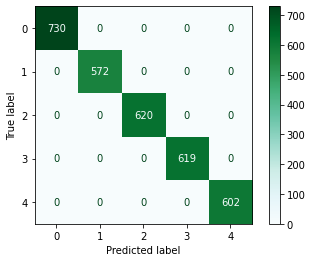

In [35]:
cm = confusion_matrix(y_train, round_pred_t)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
plt.show()

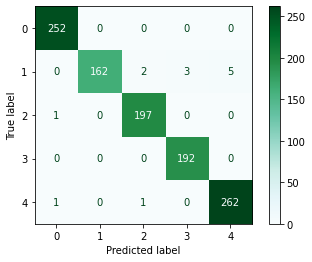

In [33]:
cm = confusion_matrix(y_test, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
plt.show()

In [36]:
print(classification_report(y_test,round_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       252
           1       1.00      0.94      0.97       172
           2       0.98      0.99      0.99       198
           3       0.98      1.00      0.99       192
           4       0.98      0.99      0.99       264

    accuracy                           0.99      1078
   macro avg       0.99      0.99      0.99      1078
weighted avg       0.99      0.99      0.99      1078



In [13]:
print(np.average(score[0].history['accuracy']))

0.9971110391616821


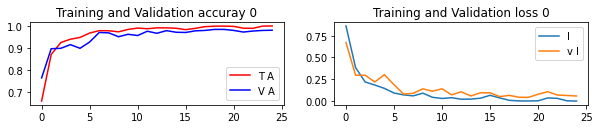

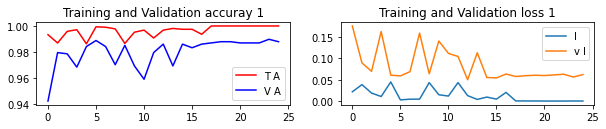

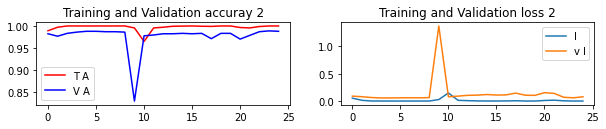

In [14]:
for i in range(3):
  acc = score[i].history['accuracy']
  loss = score[i].history['loss']
  val_acc = score[i].history['val_accuracy']
  val_loss = score[i].history['val_loss']
  #acc = history.history['accuracy']
  #val_acc = history.history['val_accuracy']
  #loss = history.history['loss']
  #val_loss = history.history['val_loss']
  plt.figure(figsize=(10,5))
  epochs = range(len(acc))
  plt.subplot(321)
  plt.plot(epochs, acc, 'r', label = 'T A')
  plt.plot(epochs, val_acc, 'b', label= 'V A')
  plt.title(f'Training and Validation accuray {i}')
  plt.legend(loc=0)
  #plt.figure(figsize=(10,5))
  plt.subplots_adjust(wspace=0.2,bottom=0.1)

  plt.subplot(322)
  plt.plot(epochs, loss,'', label = 'l')
  plt.plot(epochs, val_loss,'', label = 'v l')
  plt.title(f'Training and Validation loss {i}')
  plt.legend(loc=0)
  #plt.figure(figsize=(10,5))
  plt.subplots_adjust(wspace=0.2)
  #show the graph
plt.show()

In [ ]:
model.evaluate([x_test,x_test],y_test_one_hot)

34/34 [==============================] - 0s 8ms/step - loss: 0.1026 - accuracy: 0.9861


[0.10256566107273102, 0.9860853552818298]

In [ ]:
np.argmax(x)

9

In [ ]:
#n_split=3
score = []
i = 1
for train_index,test_index in KFold(n_splits=3).split(x_train,y_train):
  x_train,x_test=x_train[train_index],x_train[test_index]
  y_tr,y_te=y_train[train_index],y_train[test_index]
  #x_train,x_test = x_tr/255.0,x_te/255.0
  y_train_one_hot = to_categorical(y_tr)
  y_test_one_hot = to_categorical(y_te)
  #print(x_tr[:3],y_train_one_hot[:3])
  print(x_train.shape,x_test.shape,y_tr.shape,y_te.shape)
  #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  #history = model.fit([x_train,x_train],y_train_one_hot,epochs=5,validation_data=([x_test,x_test],y_test_one_hot))
  #score.append(history)
  print("ite",i)
  i+=1



ValueError: ignored

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit([x_train,x_train],y_train_one_hot,epochs=45,validation_data=([x_test,x_test],y_test_one_hot))

Epoch 1/45
99/99 [==============================] - 15s 54ms/step - loss: 0.9541 - accuracy: 0.6325 - val_loss: 0.4392 - val_accuracy: 0.8256
Epoch 2/45
99/99 [==============================] - 4s 42ms/step - loss: 0.3819 - accuracy: 0.8591 - val_loss: 0.3866 - val_accuracy: 0.8683
Epoch 3/45
99/99 [==============================] - 4s 41ms/step - loss: 0.2451 - accuracy: 0.9224 - val_loss: 0.2770 - val_accuracy: 0.8989
Epoch 4/45
99/99 [==============================] - 4s 41ms/step - loss: 0.1574 - accuracy: 0.9472 - val_loss: 0.2418 - val_accuracy: 0.9239
Epoch 5/45
99/99 [==============================] - 4s 41ms/step - loss: 0.1475 - accuracy: 0.9532 - val_loss: 0.1477 - val_accuracy: 0.9564
Epoch 6/45
99/99 [==============================] - 4s 41ms/step - loss: 0.0735 - accuracy: 0.9777 - val_loss: 0.1565 - val_accuracy: 0.9499
Epoch 7/45
99/99 [==============================] - 4s 42ms/step - loss: 0.0859 - accuracy: 0.9691 - val_loss: 0.0991 - val_accuracy: 0.9647
Epoch 8/45
9

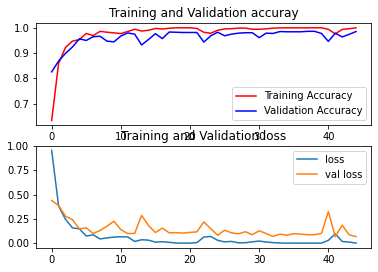

<Figure size 360x360 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.subplot(211)
plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')
plt.title('Training and Validation accuray')
plt.legend(loc=0)
plt.subplots_adjust(wspace=0.4,bottom=0.1)

plt.subplot(212)
plt.plot(epochs, loss,'', label = 'loss')
plt.plot(epochs, val_loss,'', label = 'val loss')
plt.title('Training and Validation loss')
plt.legend(loc=0)
plt.figure(figsize=(5,5))
plt.subplots_adjust(wspace=0.4)
#show the graph
plt.show()